<a href="https://colab.research.google.com/github/PanagiotisPetrid/ASTRO-BEAM-recruitment/blob/main/ASTRO_BEAM_recruitment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Simulating a radio signal

##Creating an "off" signal

Steps 1-4 | Create a sample background signal and add gaussian noise

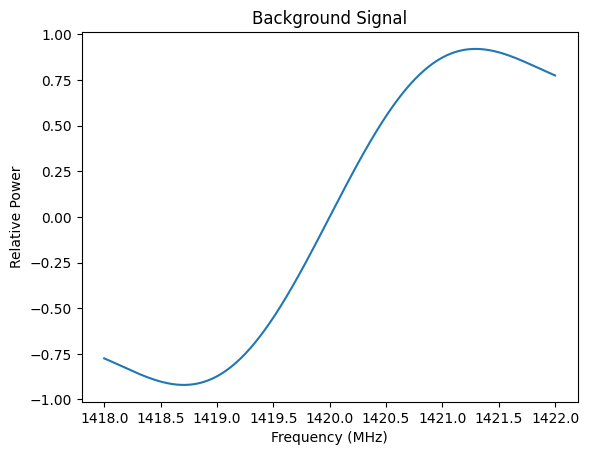

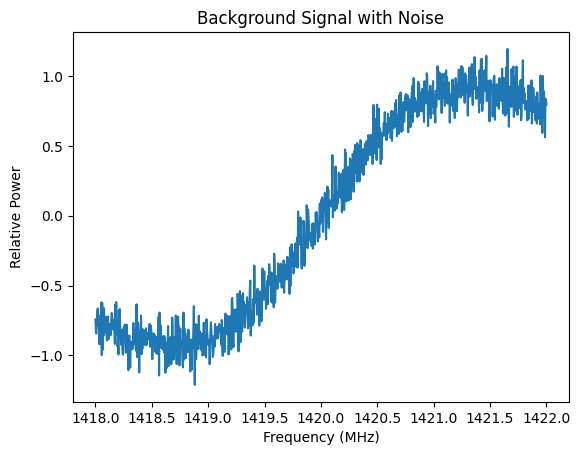

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Signal parameters
n_samples = 1000 # Number of sample measurements
freq_range = np.linspace(1418, 1422, n_samples)  # We create an evenly spaced list with frequencies of a signal (with a bandwidth of 4 MHz)

# Created a sample signal using 2 random sin waves
background_signal = (np.sin(2 * np.pi * 0.1 * freq_range) + 0.3 * np.sin(2 * np.pi * 0.3 * freq_range))

# Plot the background signal
plt.plot(freq_range, background_signal)
plt.title("Background Signal")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power")
plt.show()

# Noise generation
# Genearte noise with same size as that of the data.
noise = np.random.normal(0, 0.1, len(background_signal)) #  μ = 0, σ = 0.1, size = length of background_signal

# Add the noise to the data.
background_signal_noised = background_signal + noise

# Plot the background signal with noise
plt.plot(freq_range, background_signal_noised)
plt.title("Background Signal with Noise")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power")
plt.show()

Steps 5-8 | Generate multiple sample background signals and generate a heatmap

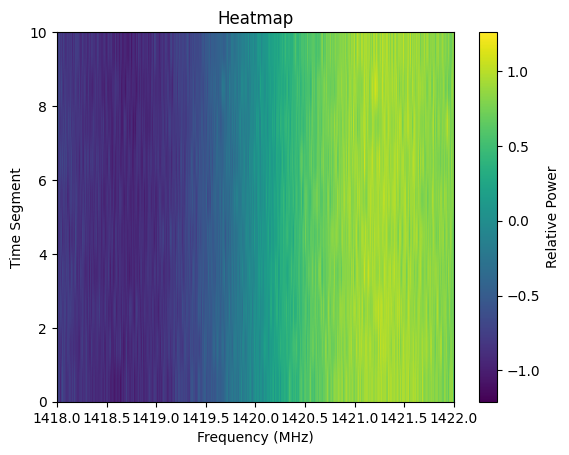

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Signal parameters (same as before)
n_samples = 1000
freq_range = np.linspace(1418, 1422, n_samples)

# Defined a function to automate random sample signal generation
def generate_background_signal(freq_range):
    background_signal = (np.sin(2 * np.pi * 0.1 * freq_range) + 0.3 * np.sin(2 * np.pi * 0.3 * freq_range))
    noise = np.random.normal(0, 0.1, len(background_signal))
    background_signal_noised = background_signal + noise
    return background_signal_noised

#Define the time segments we will use for our waterfall
n_time_segments = 10

# Create an empty array to store the signals for each time segment
waterfall = np.zeros((n_time_segments, n_samples))

for i in range (n_time_segments):
    waterfall[i, :] = generate_background_signal(freq_range)

#Visualize the waterfall as a heatmap
plt.imshow(waterfall, aspect='auto', cmap='viridis', extent=[freq_range[0], freq_range[-1], 0, n_time_segments])
plt.title("Heatmap")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Time Segment")
plt.colorbar(label="Relative Power")
plt.show()

##Creating an "on" signal

Steps 1-4 | Introducing the hydrogen line at 1420 MHz

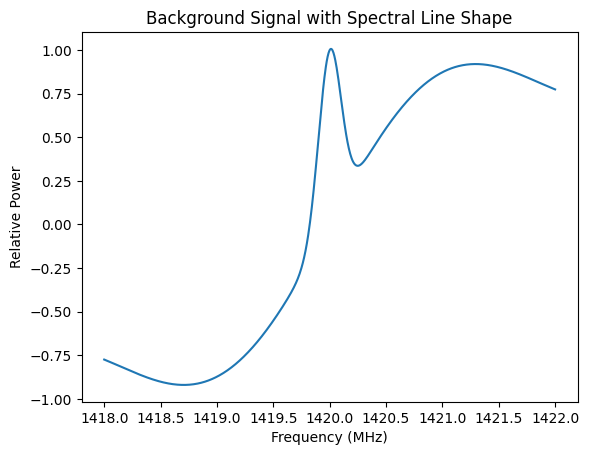

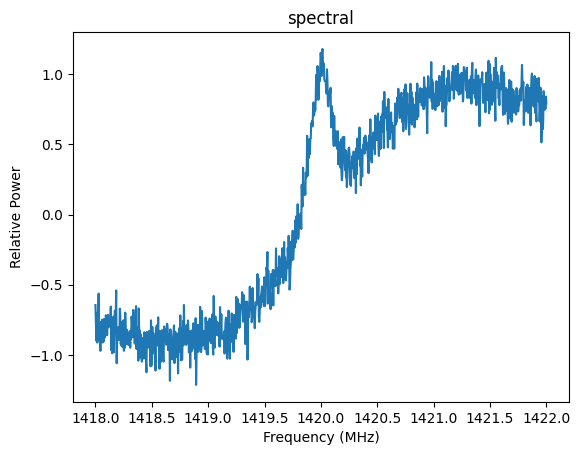

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# Signal parameters
n_samples = 1000 # Number of sample measurements
freq_range = np.linspace(1418, 1422, n_samples)  # We create an evenly spaced list with frequencies of a signal (with a bandwidth of 4 MHz)

# Created a sample signal using 2 random sin waves
background_signal = (np.sin(2 * np.pi * 0.1 * freq_range) + 0.3 * np.sin(2 * np.pi * 0.3 * freq_range))

# Add the spectral line at 1420 MHz
spectral_line_shape = np.exp(-0.5 * ((freq_range - 1420) / 0.1)**2)

# Add the spectral_line_shape to the background signal
background_signal += spectral_line_shape

#Plot the background signal
plt.plot(freq_range, background_signal)
plt.title("Background Signal with Spectral Line Shape")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power")
plt.show()

# Noise generation
# Generate noise with same size as that of the data.
noise = np.random.normal(0, 0.1, len(background_signal)) #  μ = 0, σ = 0.1, size = length of background_signal

# Add the noise to the data.
background_signal_noised = background_signal + noise

# Plot the background signal with noise
plt.plot(freq_range, background_signal_noised)
plt.title("spectral")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power")
plt.show()

Steps 5-8 | Generate a heatmap for the "Spectral" signal for multiple time segments

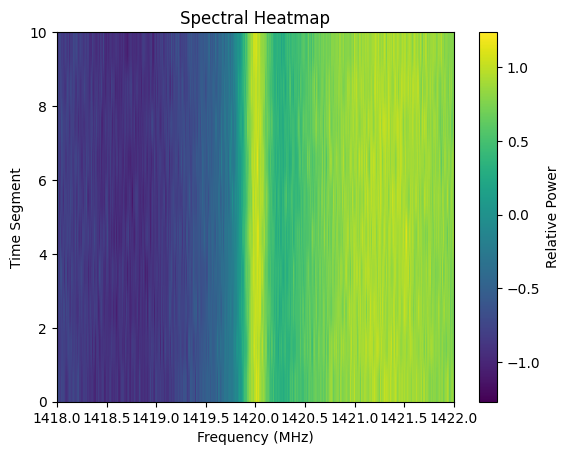

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Signal parameters (same as before)
n_samples = 1000
freq_range = np.linspace(1418, 1422, n_samples)

# Defined a function to automate random sample signal generation
def generate_spectral_signal(freq_range):
    background_signal = (np.sin(2 * np.pi * 0.1 * freq_range) + 0.3 * np.sin(2 * np.pi * 0.3 * freq_range))
    noise = np.random.normal(0, 0.1, len(background_signal))
    background_spectral_noised = background_signal + noise # Add noise
    spectral_line_shape = np.exp(-0.5 * ((freq_range - 1420) / 0.1)**2)
    background_spectral_noised += spectral_line_shape # Add spectral line shape
    return background_spectral_noised

#Define the time segments we will use for our waterfall
n_time_segments = 10

# Create an empty array to store the signals for each time segment
waterfall = np.zeros((n_time_segments, n_samples))

for i in range (n_time_segments):
    waterfall[i, :] = generate_spectral_signal(freq_range)

#Visualize the waterfall as a heatmap
plt.imshow(waterfall, aspect='auto', cmap='viridis', extent=[freq_range[0], freq_range[-1], 0, n_time_segments])
plt.title("Spectral Heatmap")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Time Segment")
plt.colorbar(label="Relative Power")
plt.show()

Gnerating the spactral line shape with twice the samples

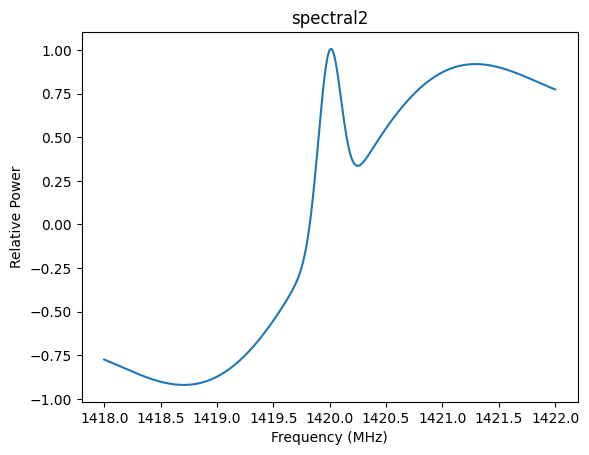

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Signal parameters
n_samples = 2000 # Twice the previous number of sample measurements
freq_range = np.linspace(1418, 1422, n_samples)  # We create an evenly spaced list with frequencies of a signal (with a bandwidth of 4 MHz)

# Created a sample signal using 2 random sin waves
background_signal = (np.sin(2 * np.pi * 0.1 * freq_range) + 0.3 * np.sin(2 * np.pi * 0.3 * freq_range))

# Add the spectral line at 1420 MHz
spectral_line_shape = np.exp(-0.5 * ((freq_range - 1420) / 0.1)**2)

# Add the spectral_line_shape to the background signal
background_signal += spectral_line_shape

#Plot the background signal
plt.plot(freq_range, background_signal)
plt.title("spectral2")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power")
plt.show()